In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style("whitegrid")

In [6]:
import os
os.chdir("C:/Users/USER/Documents/my_DS_projects/UNSUPERVISED/credit-fear-clustering")
print("Current Directory:", os.getcwd())

Current Directory: C:\Users\USER\Documents\my_DS_projects\UNSUPERVISED\credit-fear-clustering


In [12]:
# Load Data
df = pd.read_csv("SCFP2019.csv")

# Display basic information
print("Dataset Shape:", df.shape)
df.head()

Dataset Shape: (28885, 356)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,NWCAT,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT
0,1,11,6119.779308,2,75,6,12,4,2,0,...,5,3,6,3,2,10,6,6,3,3
1,1,12,4712.374912,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
2,1,13,5145.224455,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2
3,1,14,5297.663412,2,75,6,12,4,2,0,...,5,2,6,2,1,10,4,4,2,2
4,1,15,4761.812371,2,75,6,12,4,2,0,...,5,3,6,3,1,10,5,5,2,2


# Explore

In [13]:
# Filter households that are credit fearful
mask = df['TURNFEAR'] == 1
df_fear = df[mask]
print("Credit-Fearful Households Shape:", df_fear.shape)

Credit-Fearful Households Shape: (4623, 356)


## Age Analysis

In [21]:
# Age group mapping
agecl_dict = {
    1: "Under 35", 2: "35-44", 3: "45-54",
    4: "55-64", 5: "65-74", 6: "75 or Older"
}

df_fear = df_fear.copy()  # Ensure df_fear is a separate DataFrame
df_fear['AGE_GROUP'] = df_fear['AGECL'].replace(agecl_dict)

print("df_fear type:", type(df_fear))
print("df_fear shape:", df_fear.shape)
df_fear.head()

df_fear type: <class 'pandas.core.frame.DataFrame'>
df_fear shape: (4623, 357)


,YY1,Y1,WGT,HHSEX,AGE,AGECL,EDUC,EDCL,MARRIED,KIDS,...,INCCAT,ASSETCAT,NINCCAT,NINC2CAT,NWPCTLECAT,INCPCTLECAT,NINCPCTLECAT,INCQRTCAT,NINCQRTCAT,AGE_GROUP
5,2,21,3790.476607,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
6,2,22,3798.868505,1,50,3,8,2,1,3,...,2,1,2,1,1,4,3,2,2,45-54
7,2,23,3799.468393,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
8,2,24,3788.076005,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54
9,2,25,3793.066589,1,50,3,8,2,1,3,...,2,1,2,1,1,4,4,2,2,45-54


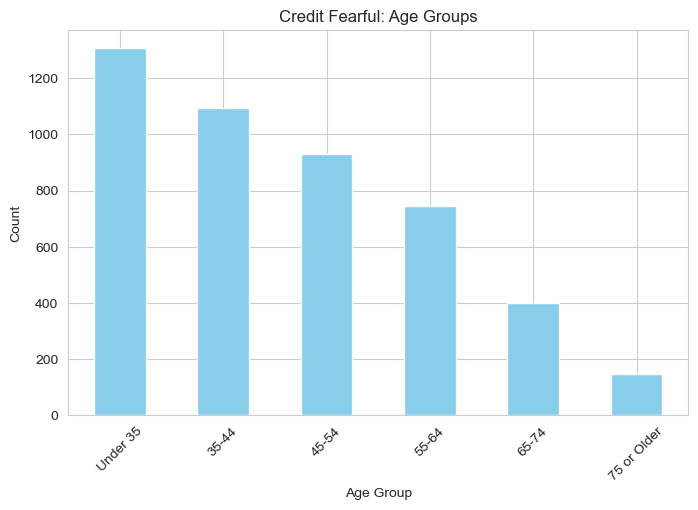

In [22]:
# Age group distribution
plt.figure(figsize=(8,5))
df_fear['AGE_GROUP'].value_counts().plot(kind='bar', color='skyblue')
plt.xlabel("Age Group")
plt.ylabel("Count")
plt.title("Credit Fearful: Age Groups")
plt.xticks(rotation=45)
plt.show()

Our chart is telling us that many of the people who fear being denied credit are younger. 

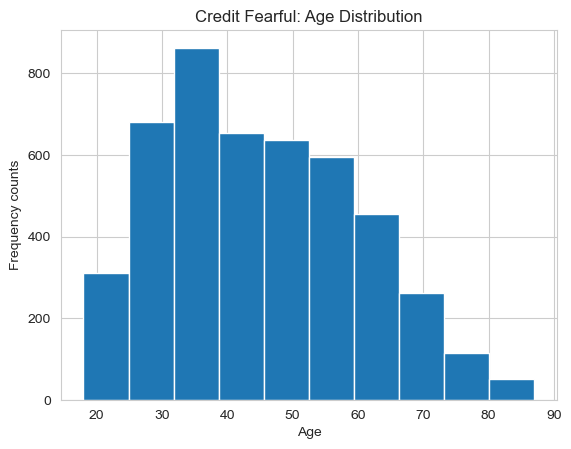

In [24]:
# Plot histogram of "AGE"
df_fear['AGE'].hist(bins = 10)
plt.xlabel('Age')
plt.ylabel('Frequency counts')
plt.title('Credit Fearful: Age Distribution');

It looks like younger people are still more concerned about being able to secure a loan than older people, but the people who are most concerned seem to be between 30 and 40

## RACE Analysis

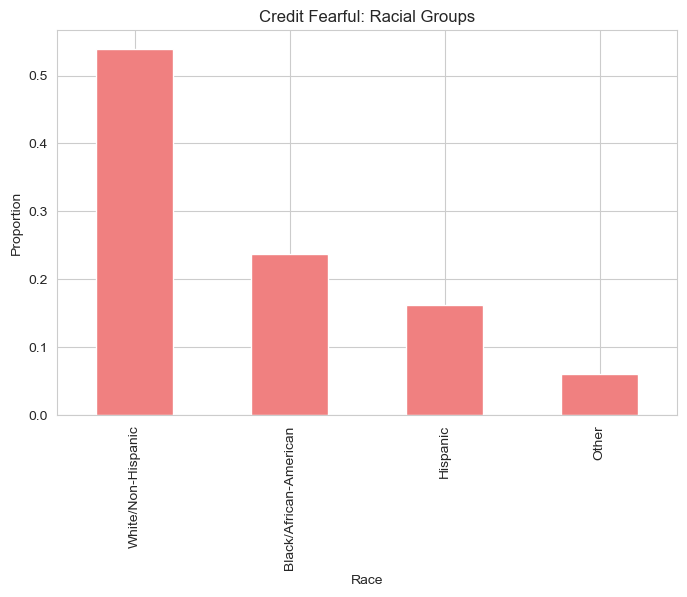

In [23]:
race_dict = {1: "White/Non-Hispanic", 2: "Black/African-American", 3: "Hispanic", 5: "Other"}
df_fear['RACE_GROUP'] = df_fear['RACE'].replace(race_dict)

plt.figure(figsize=(8,5))
df_fear['RACE_GROUP'].value_counts(normalize=True).plot(kind='bar', color='lightcoral')
plt.xlabel("Race")
plt.ylabel("Proportion")
plt.title("Credit Fearful: Racial Groups")
plt.show()

### Recreate the  bar chart i just made, but this time use the entire dataset df instead of the subset df_fear

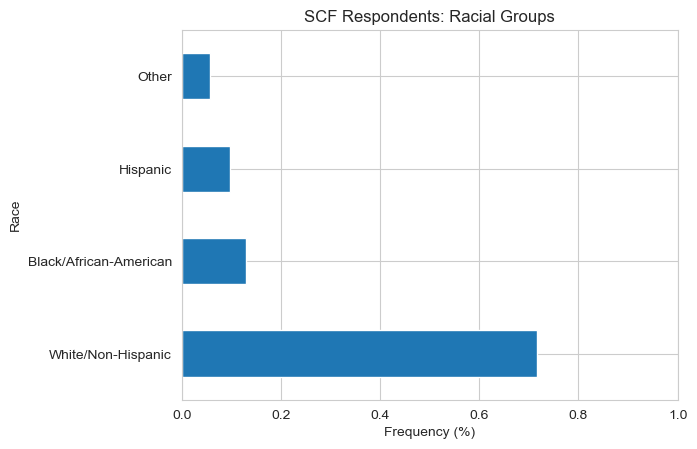

In [25]:
race = df['RACE'].replace(race_dict)
race_value_counts = race.value_counts(normalize = True)
# Create bar chart of race_value_counts
race_value_counts.plot(kind = 'barh')
plt.xlim((0, 1))
plt.xlabel("Frequency (%)")
plt.ylabel("Race")
plt.title("SCF Respondents: Racial Groups");

## Income